# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Eric Sieu Diep

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [3]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets.loaders import load_concrete
(X,y) = load_concrete(data_home=None, return_dataset=False)


### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [4]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state = 0)

tree = DecisionTreeRegressor(random_state = 0, max_depth=5)
forest = RandomForestRegressor(random_state = 0, n_estimators = 5)
grbt = GradientBoostingRegressor(random_state = 0)

models = [ tree, forest, grbt]
results = pd.DataFrame(columns= ["Training Accuracy Error", "Validation Accuracy Error"], index=["DT", "RF", "GB"])

i = 0;
for model in models:
    #model.fit(X_train, y_train)
    j = 0; 
    scores = cross_validate(model, X_train, y_train, scoring = 'neg_mean_squared_error', return_train_score = True)
    results.iloc[i,j] = scores['train_score'].mean()*(-1)
    results.iloc[i, j+1] = scores['test_score'].mean()*(-1)   
    i += 1;
    
print(results)


   Training Accuracy Error Validation Accuracy Error
DT               47.279761                 73.447331
RF                8.288296                  34.40223
GB               12.955436                 28.506459


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [5]:
# TO DO: ADD YOUR CODE HERE
print("The following scores belong to decision tree, random forest and gradient boosting machine regression respectively: ")
i = 0;
for model in models:
    model.fit(X_train, y_train)
    j = 0;
    print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
    
    scores = cross_validate(model, X_train, y_train, scoring = 'r2', return_train_score = True)
    results.iloc[i,j] = scores['train_score'].mean()
    print("Accuracy on validation set {:.3f}".format(model.score(X_test, y_test)))
    results.iloc[i, j+1] = scores['test_score'].mean()
    print("")
    i += 1;
    
print(results)

The following scores belong to decision tree, random forest and gradient boosting machine regression respectively: 
Accuracy on training set: 0.832
Accuracy on validation set 0.675

Accuracy on training set: 0.973
Accuracy on validation set 0.865

Accuracy on training set: 0.950
Accuracy on validation set 0.906

   Training Accuracy Error Validation Accuracy Error
DT                0.834465                  0.738697
RF                0.971015                  0.878148
GB                0.954713                  0.899428


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.

These results are much better than that of a linear model used in previous assignment. The R2 score achived by a linear model are only 0.61 and 0.62 for training and testing score respectively. In the tree base model, the worst training and testing scores are 0.83 and 0.74 (about 20% better than linear model) while the best scores are 0.95 and 0.9 (about 45% better)

2. Out of the models you tested, which model would you select for this dataset and why?

According to the the results table, the gradient bossting machine model gives the best score, the random forest are second best and single decision tree ranks bottom. However, the scores achieved from the GB model are only about 2% higher than that of the RF, which is insignificant. Since GB requires careful tuning of the parameters, which can be difficult to do, while RF is tuning-free*, I will choose random forest for this dataset because it is simpler to execute and the results achieve is as good as the best model and about 20% better than a single decision tree.
*source: https://fastml.com/what-is-better-gradient-boosted-trees-or-random-forest/

3. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.
To improve the accuracy, we can:
 - increase the the number of n_estimators as more trees will provide better result with a better average scores. Note that this would take longer
 - tuning the max_depth of the trees to find an optimized number of depth
 - tuning the number of features used, as max_features determines how random each tree is, and a smaller max_features reduces overfitting
 Source: section 2.3 in https://www.keboola.com/blog/random-forest-regression
 

*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?

I found the source code in the example provided in lecture. The lectures slides did an excellent job explaining the concepts and the jupyter notebook example was very helpful. 

2. In what order did you complete the steps?

The assignment has clear instructions and steps that I follow with ease to complete the assignment. Again, the steps reinforces the five steps in Machine Learning Workflow taught in the begining of the class.

3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I did not use AI for this assignment.

4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

I don't have any challaenges completing this assignment as the ideas are about the same as previous assignments. Only difference commands/funciton are used. I still need to look up on the syntax and the command name in order to spell them correctly. I go to the scikit documentation site to check on the function command and its arguments/attributes. I found it's very helpful learning to read the documentation.

*DESCRIBE YOUR PROCESS HERE*

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [15]:
# TO DO: Import wine dataset
!head "C:\Users\Eric\MEng\MEng-Fall-2023\ENSF611\a3\wine\wine.data"
data = pd.read_csv(r"C:\Users\Eric\MEng\MEng-Fall-2023\ENSF611\a3\wine\wine.data", 
                   names = ['Wine Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 
                           'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                           'Color Intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'],
                  header = None)

1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480
1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735
1,14.2,1.76,2.45,15.2,112,3.27,3.39,.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.5,2.52,.3,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.6,2.51,.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14,97,2.8,2.98,.29,1.98,5.2,1.08,2.85,1045
1,13.86,1.35,2.27,16,98,2.98,3.15,.22,1.85,7.22,1.01,3.55,1045


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [7]:
# TO DO: ADD YOUR CODE HERE
print(data.head(5))
print(data.info())

   Wine Class  Alcohol  Malic Acid   Ash  Alcalinity of Ash  Magnesium  \
0           1    14.23        1.71  2.43               15.6        127   
1           1    13.20        1.78  2.14               11.2        100   
2           1    13.16        2.36  2.67               18.6        101   
3           1    14.37        1.95  2.50               16.8        113   
4           1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color Intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     106

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [8]:
# TO DO: ADD YOUR CODE HERE
print(data.isnull().sum())

Wine Class                      0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of Ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color Intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


How many samples do we have of each type of wine?

In [9]:
# TO DO: ADD YOUR CODE HERE
data['Wine Class'].value_counts()


Wine Class
2    71
1    59
3    48
Name: count, dtype: int64

### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [10]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

#import library
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#set up the X, y matrix
X = data.drop(columns = 'Wine Class')
y = data['Wine Class']
print('Dimension of X matrix: ', X.shape)
print('Dimension of target variable: ', y.shape)

#spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
print(X_train.shape)
print(X_test.shape)

y_train.value_counts()
y_test.value_counts()

#instantiate the model
tree_classifier = DecisionTreeClassifier(max_depth = 3, random_state = 0)
svc = SVC(random_state = 0)
models = [tree, svc]
results = pd.DataFrame(columns = ['Training Accuraccy', 'Validation Accuracy'], index = ['DTC', 'SVC'])
i = 0

for model in models:
    model.fit(X_train, y_train)
    j = 0
    scores = cross_validate(model,X_train, y_train, scoring = 'accuracy', return_train_score = True)
    results.iloc[i, j] = scores['train_score'].mean()
    results.iloc[i, j+1] = scores['test_score'].mean()
    i += 1
    
print(results)
    

Dimension of X matrix:  (178, 13)
Dimension of target variable:  (178,)
(133, 13)
(45, 13)
    Training Accuraccy Validation Accuracy
DTC                1.0            0.901994
SVC           0.680427            0.676638


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

The decistion tree classifier gave the highest accuracy at 0.9 while the SVC only gave an accuracy of 0.67

In [11]:
# TO DO: Implement best model
best_model = tree_classifier.fit(X_train, y_train)

Text(170.97222222222223, 0.5, 'true value')

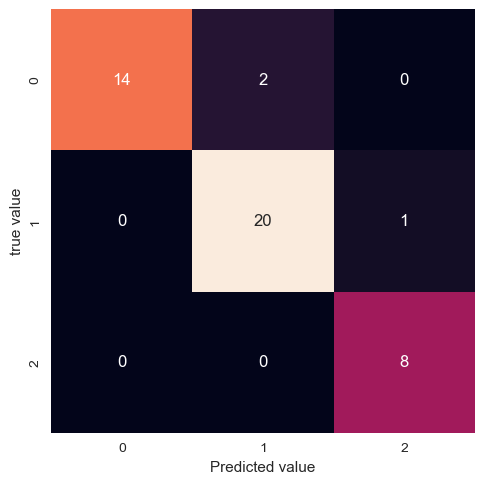

In [12]:
# TO DO: Print confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, best_model.predict(X_test))
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Predicted value')
plt.ylabel('true value')


In [13]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.91      0.95      0.93        21
           3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
The decision tree classifier did very well with a training score of 1.0 and a accuracy score of 0.9. It did excellent in learning the model and predicting the value. On the other hand, the support vector machine models did poorly compared to the DTC. The training score and accuracy score drops drastically over 30% to 0.68 for both score. Note that the variance is extremely low for both models.

2. What are two reasons why the support vector machines model did not work as well as the tree-based model?

 - The decision boundary created by the SVM is most likely non-linear.The SVM adds non-linear features in the model, and it is possible that the dataset used is better fit with linear features.
 - Another possible cause is the data was not preprocessed properly, and the hyper -parameters were not tuned properly. The SVM required the parameters to be tuned carefully for it to work.
 
3. How many samples were incorrectly classified in step 5.2? 
Three samples were incorrectly classified accoridng to the confusion matrix.

4. In this case, is maximizing precision or recall more important? Why?
In this case, it doesn't really matter whether maximizing precision or recall. They are equally important, as I don't see why it is important to correctly classify a wine unless there is an economic value. As stated in the source of the data site "These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars." 

Precision focuses on false positive i.e. a wine classfied as positive category but it is not (for eg, it is classified as class 1, but belongs to class 2 or 3). Recall focuses on false negative i.e. a wine classified in a negative class, but it is not (for eg it is not classified in class 1, (i.e. classified in class 2 or 3), but it is actually class 1). Assuming class 1 wine is a lot more expensive ( and expensive enough to make an impact) than the other two classes , maximizing precisons means minimize the chances of selling "fake" wine ( aka selling a cheap wine at a much higher price), while maximizing recall means minimizing in loss of revenue. The former is reputation and risk of being sued, while the later is money which are equally improtant in my opinion.

On a second thought, I won't spend money on wine anyway, so it doesn't matter to me.

*YOUR ANSWERS HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:

1.Where did you source your code?

I found the source code in the example provided in the jupyter notebook. The coding part is not difficult

2. In what order did you complete the steps?

I follow the order in the Machine Leanring Workflow which is also the steps of the instruction. Loading data, inspect and cleaning data, load the model and instantiate the ML model, split the data into train and test, validate the model and visualize the results

3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I did not use AI.

4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

I found it's a challenge to read and intepret the confusion matrix for multiclass. It's easy to identified TP，TN, FP and FN in a binary matrix. I did some google and found a very good website explaining it https://www.evidentlyai.com/classification-metrics/confusion-matrix I have a very good understanding about confustion matrix and its metrics of recall and precision. However, I still have a hard time to decide whether recall or precision is more important as it depends on the actual kind of data model. In this assignment, predicting a wine class, I don't really see the importance whether a type of wine is correctly classified.

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


I notice that it's important to choose the right model for the datasets. A linear models for linear data and vice versa. In the concrete examples, a linear model did very poorly (accuracy score of 0.6, while the non-linear (tree, forest and grbt) did very well (accuracy score between 0.7 to 0.9). The data source mentioned that there are non-linear features existed in the datasets. 

I also notice that a more complex model doesn't neccessary mean a better result. As in the concrete examples in part 1, random forest gradient boosting model generate about the same result (0.88 vs 0.9). In the wine example, the decision tree is better than the support vector (0.9 vs 0.7 scores) noted that decision tree doesn't required hyper parameter tuning, while the other two do need a careful tuning. Decision tree is considered less powerful than the other two, but it is easier to work with. So always start with a simple model first is the key idea discusse in class. 

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.



I like the fact that the assignment makes use of various non-linear models and make a comparision among the results of each model. This reinforces what discussed in the lecture about the weakness and strength of each model by seeing the results in a table. Also, the assignment also makes us refer to the results of previous assignment, so we can see the difference between linear an non-linear models, which is great. 

The confusion matrix is a bit confusing, but I got it figured out after further reading.The meaning of recall and precison still remains confusing as it depends on the actual data. So I will just watch out for it.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [14]:
# TO DO: ADD YOUR CODE HERE
from sklearn.svm import LinearSVC

lsvc = LinearSVC(max_iter = 5000)
lsvc.fit(X_train, y_train)

scores = cross_validate(lsvc, X_train, y_train, return_train_score = True, scoring = 'accuracy')
print("type of scores: ", type(scores))
print(scores.keys())

print("train score: ", scores['train_score'].mean())
print("test score: ", scores['test_score'].mean())


C:\Users\Eric\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Eric\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Eric\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Eric\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Eric\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change 

type of scores:  <class 'dict'>
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
train score:  0.9059248809733734
test score:  0.8717948717948719


C:\Users\Eric\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Eric\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Eric\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Eric\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Eric\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increa

*ANSWER HERE*

In [ ]:
Using LinearSVC improves the result significantly compared to SVC. With Linear SVC the results improved over 20% with a scores 
closer to 0.9 from 0.7 apprx. As mentioned before, the dataset is better suite with linear features than non linear features. 
LinearSVC has more linear features in the model that make the decision boundary more linear, hence improving the score to 0.9.
This make Linear SVC a good fit for the model with a very low variance between the training score and testing score.